In [23]:
from scipy.optimize import minimize
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%run functions.py

In [12]:
num_days = 252

In [13]:
wanted_stocks = ['GOOG', 'SPG', 'GOOGL', 'MSFT', 'GD', 'ACN', 'COP', 'F', 'BAC', 'GS',
       'NVDA', 'AIG', 'MS', 'WFC', 'ORCL', 'XOM', 'TGT', 'LOW', 'EXC', 'COST',
       'AXP', 'BK', 'JPM', 'COF', 'CSCO', 'DHR', 'UNH', 'CVS', 'LLY', 'CVX',
       'MET', 'AMT', 'CRM', 'BLK', 'RTX', 'MCD', 'TMO', 'LIN', 'ADBE', 'EMR',
       'USB', 'UPS', 'TSLA', 'PFE', 'PM']

In [14]:
stocks = pd.read_csv('sap100_data_08112021.csv',index_col=0).loc[:,wanted_stocks]
stocks.head()

,GOOG,SPG,GOOGL,MSFT,GD,ACN,COP,F,BAC,GS,...,MCD,TMO,LIN,ADBE,EMR,USB,UPS,TSLA,PFE,PM
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,1728.239990,80.108383,1726.130005,216.689423,142.191360,253.328720,38.381340,8.52,29.604614,261.802551,...,206.653915,471.064941,255.930817,485.339996,76.753830,45.091583,161.141953,729.770020,35.423965,78.486618
2021-01-05,1740.920044,80.456642,1740.050049,216.898438,142.259567,254.770905,40.583153,8.65,29.831354,267.660980,...,207.892548,476.955505,259.945679,485.690002,78.082092,45.238235,158.898941,735.109985,35.789654,79.343712
2021-01-06,1735.290039,82.294655,1722.880005,211.274414,145.893768,257.556427,42.202988,8.84,31.694584,282.104553,...,207.420670,484.433533,268.479645,466.309998,80.709106,47.917137,158.426727,755.979980,35.481701,79.449646
2021-01-07,1787.250000,82.352692,1774.339966,217.286652,147.822922,259.986450,43.357246,9.06,32.394527,288.130981,...,208.384064,499.529297,267.708313,477.739990,80.748459,48.875290,156.419815,816.039978,35.664547,79.911911
2021-01-08,1807.209961,83.668327,1797.829956,218.610550,146.897308,260.934753,43.357246,9.00,32.069199,286.579926,...,212.208069,511.480133,267.391876,485.100006,80.502480,48.220222,155.819717,880.020020,35.731911,80.017830


In [15]:
returns = stocks/stocks.shift(1)-1
returns.head()

,GOOG,SPG,GOOGL,MSFT,GD,ACN,COP,F,BAC,GS,...,MCD,TMO,LIN,ADBE,EMR,USB,UPS,TSLA,PFE,PM
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.007337,0.004347,0.008064,0.000965,0.000480,0.005693,0.057367,0.015258,0.007659,0.022377,...,0.005994,0.012505,0.015687,0.000721,0.017305,0.003252,-0.013919,0.007317,0.010323,0.010920
2021-01-06,-0.003234,0.022845,-0.009868,-0.025929,0.025546,0.010933,0.039914,0.021965,0.062459,0.053962,...,-0.002270,0.015679,0.032830,-0.039902,0.033644,0.059218,-0.002972,0.028390,-0.008605,0.001335
2021-01-07,0.029943,0.000705,0.029869,0.028457,0.013223,0.009435,0.027350,0.024887,0.022084,0.021362,...,0.004645,0.031162,-0.002873,0.024512,0.000488,0.019996,-0.012668,0.079447,0.005153,0.005818
2021-01-08,0.011168,0.015976,0.013239,0.006093,-0.006262,0.003648,0.000000,-0.006623,-0.010043,-0.005383,...,0.018351,0.023924,-0.001182,0.015406,-0.003046,-0.013403,-0.003836,0.078403,0.001889,0.001325


In [17]:
r = returns.mean() * num_days
V = returns.cov() * num_days
sigma = returns.std() * np.sqrt(num_days)
print(r.head(),V.head(),sigma.head())

GOOG     0.643850
SPG      0.798228
GOOGL    0.644627
MSFT     0.526512
GD       0.437839
dtype: float64            GOOG       SPG     GOOGL      MSFT        GD       ACN       COP  \
GOOG   0.059152  0.015217  0.059287  0.035130  0.007999  0.019704  0.016042   
SPG    0.015217  0.092785  0.014787  0.006908  0.022520  0.016239  0.051497   
GOOGL  0.059287  0.014787  0.062428  0.036748  0.007803  0.019641  0.016128   
MSFT   0.035130  0.006908  0.036748  0.042574  0.003716  0.019892 -0.002032   
GD     0.007999  0.022520  0.007803  0.003716  0.029850  0.012099  0.021925   

              F       BAC        GS  ...       MCD       TMO       LIN  \
GOOG   0.011181  0.008179  0.009389  ...  0.013291  0.013036  0.016222   
SPG    0.055850  0.038585  0.040722  ...  0.013736 -0.007785  0.020683   
GOOGL  0.011420  0.007795  0.009054  ...  0.012829  0.014384  0.016627   
MSFT   0.003265 -0.004523 -0.000584  ...  0.010636  0.021209  0.015375   
GD     0.018899  0.023948  0.021352  ...  0.008052

# Markowitzov problem ako minimalizacia sharpie ratio

In [20]:
n_stocks = len(stocks.columns)

def negativeSR(w):

    w = np.array(w)
    rate = np.sum(r*w)
    volatitity = np.sqrt(np.dot( w.T, np.dot(V,w)))
    SR = rate/volatitity
    return -1*SR

bounds = tuple(((0,1) for _ in range(n_stocks)))

def check_sum_to_one(w):
    return np.sum(w) - 1
constraints = ({'type':'eq','fun':check_sum_to_one})

w0 = np.array([1/n_stocks*n_stocks])
w_opt = minimize(negativeSR, w0, method='SLSQP', bounds=bounds, constraints= constraints)
w_opt

     fun: -4.736986324689776
     jac: array([-3.19480896e-05,  1.47938728e-04,  1.40866995e-01,  1.23507380e-02,
       -2.74181366e-04,  8.52668762e-01,  3.15666199e-04,  2.79843807e-04,
        2.46345997e-04,  2.89607286e-01, -1.18684769e-03,  3.57425988e-01,
        7.70015657e-01, -7.77244568e-05,  7.40766525e-04,  7.65626550e-01,
        6.82696939e-01, -3.26633453e-05, -6.19947910e-04,  1.02819085e-01,
        9.80574489e-01,  5.02770543e-02,  1.13673079e+00,  3.10912073e-01,
        1.32897937e+00, -3.40163708e-04,  9.10835266e-02,  5.29485345e-02,
        3.69191170e-04,  1.90782148e+00,  1.84336978e+00, -2.93672085e-04,
        3.24721396e-01,  3.04851729e+00,  1.84049094e+00,  5.43408811e-01,
       -1.51038170e-04,  1.68617302e+00,  1.47644329e+00,  2.59895605e+00,
        1.54508483e+00,  8.82568240e-01, -1.95741653e-03, -2.76982784e-04,
        1.23296708e+00])
 message: 'Optimization terminated successfully'
    nfev: 1126
     nit: 24
    njev: 24
  status: 0
 success:

In [21]:
w_opt.x

array([8.61185170e-02, 3.86460364e-02, 3.25867438e-16, 3.61523161e-16,
       7.74913697e-02, 5.90414144e-16, 8.20723322e-02, 7.53276357e-02,
       3.04574959e-02, 1.20313302e-16, 4.83735287e-02, 1.89864882e-16,
       7.61567785e-16, 2.39355951e-02, 1.24778202e-01, 1.19182161e-15,
       5.39021137e-16, 3.83151141e-02, 1.50765593e-02, 1.12246633e-16,
       1.03639189e-15, 3.87959602e-16, 1.43158511e-15, 4.22168192e-17,
       1.78317921e-15, 1.07240933e-01, 4.58360595e-17, 2.79926156e-16,
       8.67301741e-02, 3.59827942e-15, 2.67884112e-15, 1.24862641e-01,
       1.59539393e-16, 4.50090152e-15, 2.68528129e-15, 1.87845977e-16,
       1.74196768e-02, 1.77688418e-15, 1.73299148e-15, 4.44333472e-15,
       2.74287514e-15, 9.67442574e-16, 5.03409431e-03, 1.81200956e-02,
       1.21506315e-15])

In [31]:
final_r = np.sum(w_opt.x * r)
final_r

0.5863162296755479

In [32]:
final_v = np.dot(w_opt.x.T, np.dot(V,w_opt.x))
final_v

0.015320028386045079

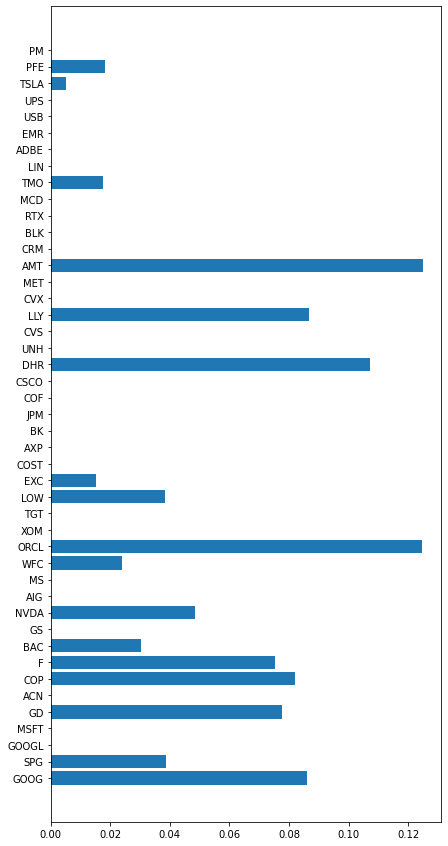

In [29]:
plt.figure(figsize=(7,15))
plt.barh(stocks.columns,w_opt.x)
plt.show()